## Определение машинного обучения

*Говорят, что компьютерная программа обучается на опыте **E** в отношении некоторого класса задач **T** и оценивает производительность **P**, если ее производительность в задачах из **T**, измеряемая в **P**, возрастает с опытом **E**.*

#### Основные задачи решаемые машинны обучением.
   - **Классификация** - отнесение экземпляра к одной из групп на основе его характеристик
   - **Регрессия** - прогнозированние численного признака
   - **Кластеризация** - разделение экземпляров выборки на группы, так чтобы члены внутри группы были более похожи друг на друга, чем членов других групп
   - **Обнаружение аномалий** - поиск экземпляров, которые сильно отличаются от остальной выборки

Алгоритмы машинного обучения можно разделить на те которые обучаются, **supervised** и **unsupervised**. (с учителем \ без учителя)

**Алгоритмам обучения без учителя** в качестве E предоставляется набор данных, содержащий много признаков, алгоритм должен выявить полезные сойства этого набора.

**Алгоритмам обучения с учителем** предъявляется набор данных, содержащих признаки, в котором каждый пример, снабжен *меткой* или *целевым классом*. Мы должные предиктить целевой класс, зная его значения в тренировочной выборке.

## Decision Tree
Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации.

### Как строится дерево решений?
Нужно задавать вопрос отсекающие наибольшее кол-во вариантов. Это интуитивно соответствует понятию прироста информации, основанного на **энтропии**.

#### Entropy (Энтропия)
**Энтропия Шенона** для системы с $N$ возможными состояниями определяется следующим способом: $$S = -\sum_{i=1}^{N}p_ilog_{2}p_i$$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. **Энтропия** соответствует степени хаоса в системе. Чем выше энтропия, тем меньше упорядочена система, и наоборот. (показывает, насколько случайной или предсказуемой является последовательность символов)

Если вроятность равномерно распределена, то энтропия будет максимальной. Если какая-то вероятность равна $1$, остальные $0$, то минимальной.

#### Пример
Пример эллюстрирующий как энтропия, помогает в выборе хороших признаков для постороения деревьев решений. Попробуем предсказать цвет шарика, относительно его позиции.

![img](https://mlcourse.ai/_images/decision_tree3.png)

9 синих шариков и 11 желтых. Если мы будем случайно выбирать шарик, то получим $p_1=9/20, \ p_2=11/20$. Значит энтропия $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. Само по себе это значние ничего не говорит. Разобьем шарики на 2 группы, по $x=12$.

![alt text](https://habrastorage.org/r/w1560/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png)

В левой группе 8 желтых и 5 синих, энтропия этой группы $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$

В правой группе 6 желтых и 1 синий. $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}} -\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$

Энтропия уменьшилась в обеих группах. Так как энтропия степень хаоса системы, то снижение энтропии называют **приростом информации**.

Прирост информации (information gain, IG) при разбиении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") определяется:
$$IG(Q) = S_0 - \sum_{i=1}^{q} \frac{N_i}{N}S_i,$$
где, $q$ - число групп после разделения, $N_i$ - число элементов в группе, у которых $Q$ имеет $i$-е значение.
В нашем случае после разделения получилось 2 группы, из 13 и 7 элементов.

$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$

**Получается** что разделив систему по признаку $x<=12$, мы получили уже *более упорядоченную систему*. Продолжая получим
![alt text](https://mlcourse.ai/_images/topic3_credit_scoring_entropy.png)

Энтропия группы в которой все шарики одного цвета равна *нулю*. 

Мы получили дерево решений, отлично работающее для изначальной выборки. Однако если мы хотим, чтобы оно работало и с другими выборками, стоит построить дерево с менишим колличеством вопросов, пусть даже оно будет не идельано разбивать. Эта проблема называется **переобучение** или **overfitting**.

## Алгоритм построения дерева

В основе популярных алгоритмов постоения деревьев лежит жадный принцип, максимизации информационного прироста. На каждом шаге алгорим выбирает переменную, которая дает наибольший информационный прирост. Эта процедура повторяется реуксивно, пока энтропия не приблизится к нулю. Разные алгоритмы используют разные эвристики, чтобы избежать переобучения.

```py
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  
```

## Другие критерии качества для разделения задач классификации
Неопределенность Джини (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$

Ошибка классификации (misclassification error): $E = 1 - \max\limits_k p_k$

На практике ошибка классификации почти не используется, а н. Джинни почти совпадает с инф. приростом.

### Пример sklearn.tree.DecisionTreeClassifier
Сгенерируем синтетические данные, оба класса будут нормально распределены, с разными МО.

In [18]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [76]:
# гененрируем данные

np.random.seed(17) # делаем случайность возпроизводимой

train_data = np.random.normal(size=(100,2)) # R^100x2, случайных числел
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)] # склеили 2 выборки, с МО=0 и МО=2
train_labels = np.r_[train_labels, np.ones(100)]

Задача классификации в этом случае сводится к проведению границы, разделяющей 2 класса. Машинное обучение в этом случае сводится к проведению границы. Прямая линия может быть слишком простой, в то время как, сложная кривая, огебающая каждую красную точку, приведет к проблемам, с другой выборкой в этом же распределнии. Интуитивно, подходит какая то гладкая граница, разделяющая на 2 класса.

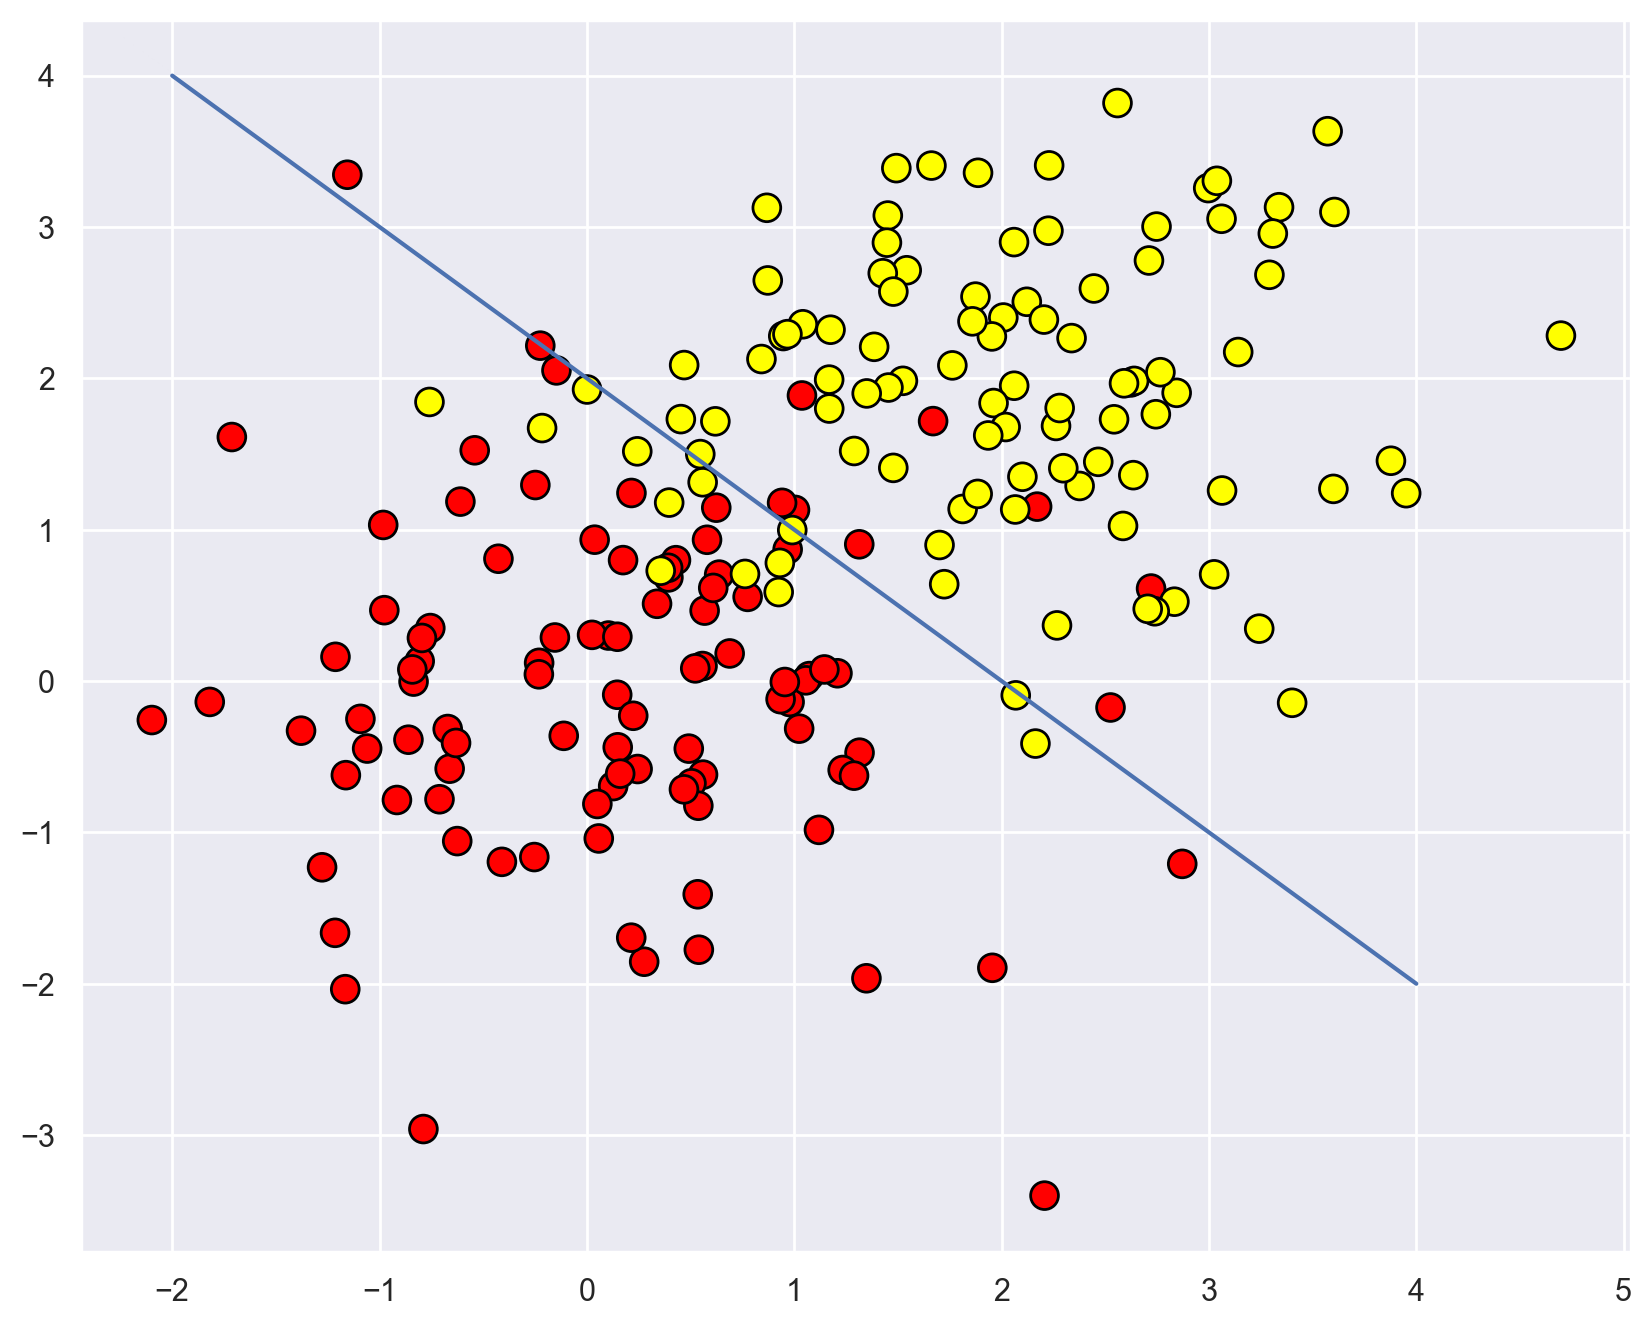

In [77]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:,0], 
    train_data[:,1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
)
plt.plot(range(-2, 5), range(4, -3, -1))

Примени sklearn decision tree. Будем использовать параметр max_depth, чтобы ограничивать глубину дерева.

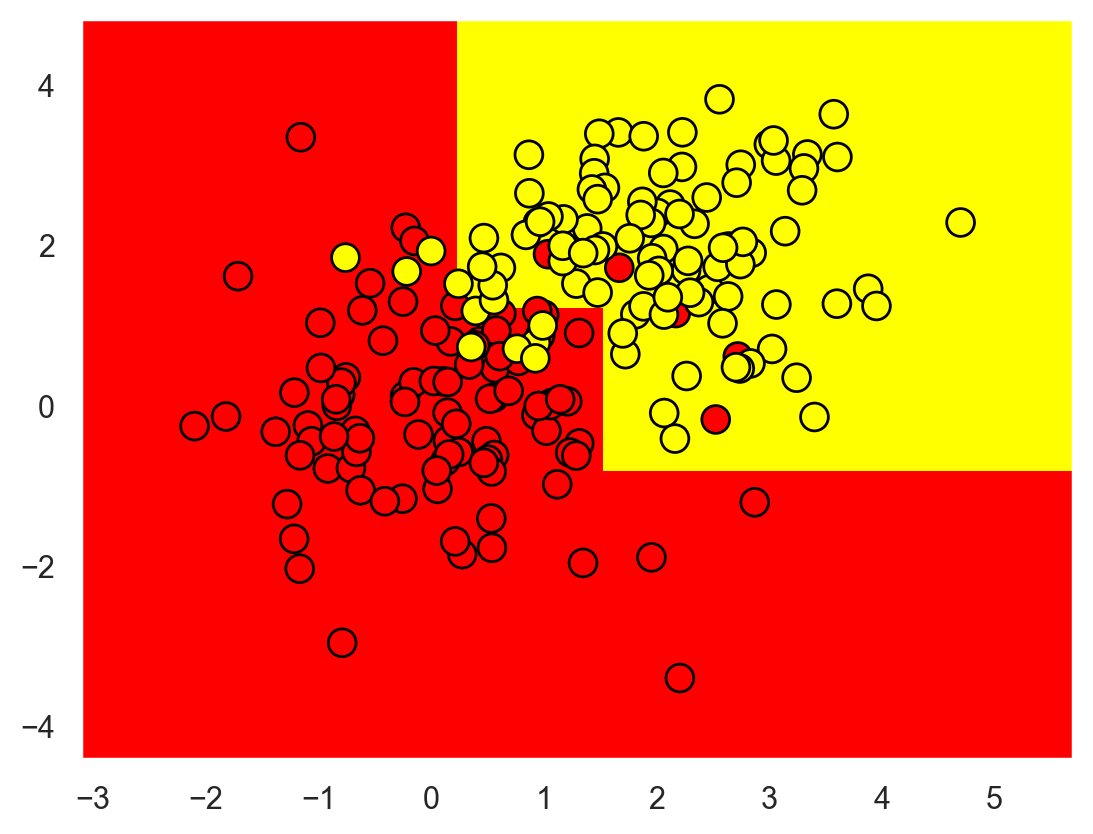

In [78]:
from sklearn.tree import DecisionTreeClassifier

# np.meshgrid() полезна для визуализации границ классов в задаче 
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels) # обучаем дерево

xx, yy = get_grid(train_data)

# ravel - превращает двумерный массив в одномерный. То есть, мы получили вектор всех X-координат и всех Y-координат.
# np.c_[] объединяет массивы по столбцам, создавая список точек.
# reshape(xx.shape) превращает одномерный массив предсказанных классов обратно в форму сетки xx
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# Теперь это матрица, где каждый элемент соответствует предсказанному классу в сетке.

plt.pcolormesh(xx, yy, predicted, cmap="autumn") # визуализипуем меш xx yy, по predicted
plt.scatter(
    train_data[:,0], 
    train_data[:,1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
)


Теперь визуализуем само дерево

In [79]:
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree1.png",
)


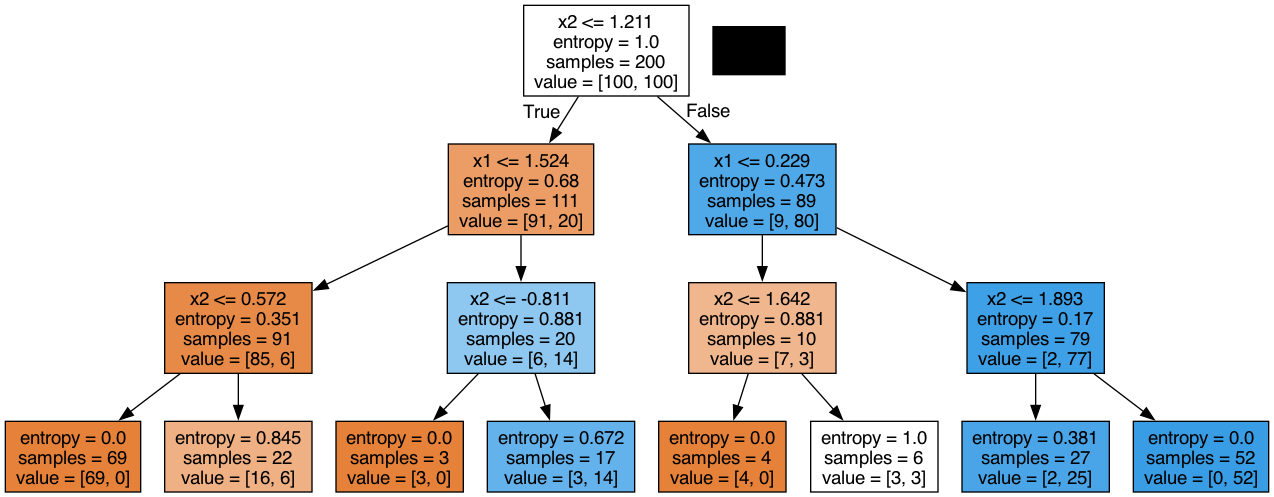

## Деревья решений и численные признаки

В случае колличественных признаков может быть слишком много разбиений, получается сильно много бмнарных признаков на каждом шаге построенния дерева.

Рассмотрим на игрушечном примере.

In [83]:
data = pd.DataFrame({
    "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
    "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
})
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [90]:
age_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)
age_tree.fit(data["Age"].values.reshape(-1,1), data["Loan Default"].values)

tree_graph_to_png(age_tree, feature_names=["Age"], png_file_to_save="topic3_decision_tree2.png",)


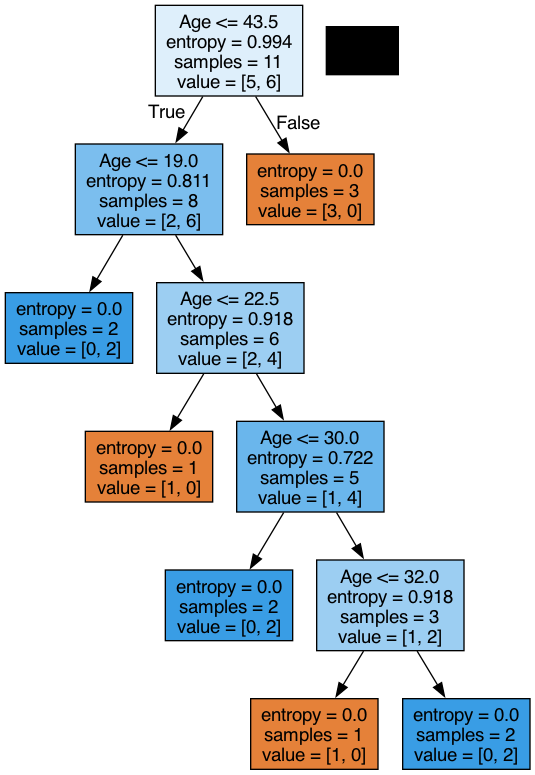

In [92]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2.sort_values("Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [99]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values)
tree_graph_to_png(age_sal_tree, ["Age","Salary"], "topic3_decision_tree3.png")

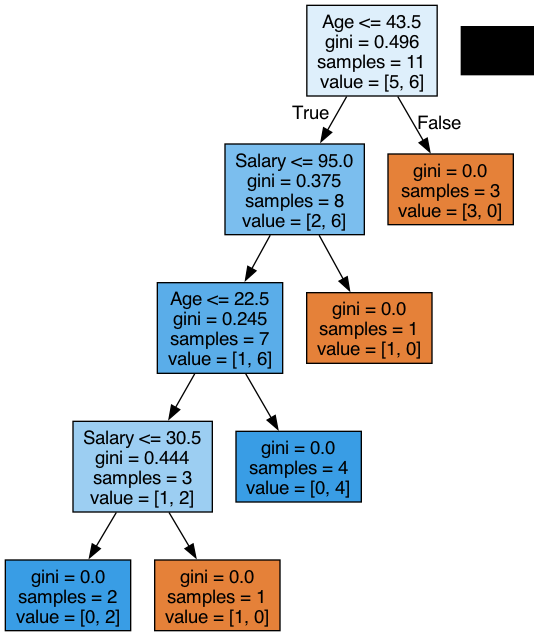

### Вывод 
Cамая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение

## Важнейшие параметры деревьев. Crucial Tree Parameters

Если мы строем дерево максимальной глубины, произойдет перееобучение и на другой выборке алгоритм работать не будет. Есть 2 исключения, когда мы строим дерево максимальной глубины

- **Random Forest** - усредняет ответы, от деревьев макс глубины
- **Pruning trees** - дерево сначала на максимальную глубину. Затем, снизу вверх, удаляются некоторые узлы дерева путем сравнения качества дерева с этим разделением и без него

**Способы бороться с перееобучением**
- исскуственное ограничение глубины дерева
- обрезка дерева

## DecisionTreeClassifier в Scikit-learn
[sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- `max_depth` - максимальная глубина
- `max_features` - максимальное колличество признаков по которым можно искать
- `min_samples_leaf` - минимальное колличество образцов в семпле. Предовращает, создание дерева, где в листах будет по несколько параметров.

> эти параметры должны устанавливаться в зависимости от входных данных. Обычно это делается при помощи кросс валидации

## Деревья решений в задаче регрессии.

При прогнозировании количественного признака идея построения дерева остается та же, но меняется критерий качества:

Дисперсия вокруг среднего: $\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2,$ где $\ell$ - число объектов в листе, $y_i$ - значения целевого признака.
Мы мимизируем дисперсию, ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

Сгенерируем данные, распределенные вокруг функции $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ c некоторым шумом, обучим на них дерево решений и изобразим, какие прогнозы делает дерево.

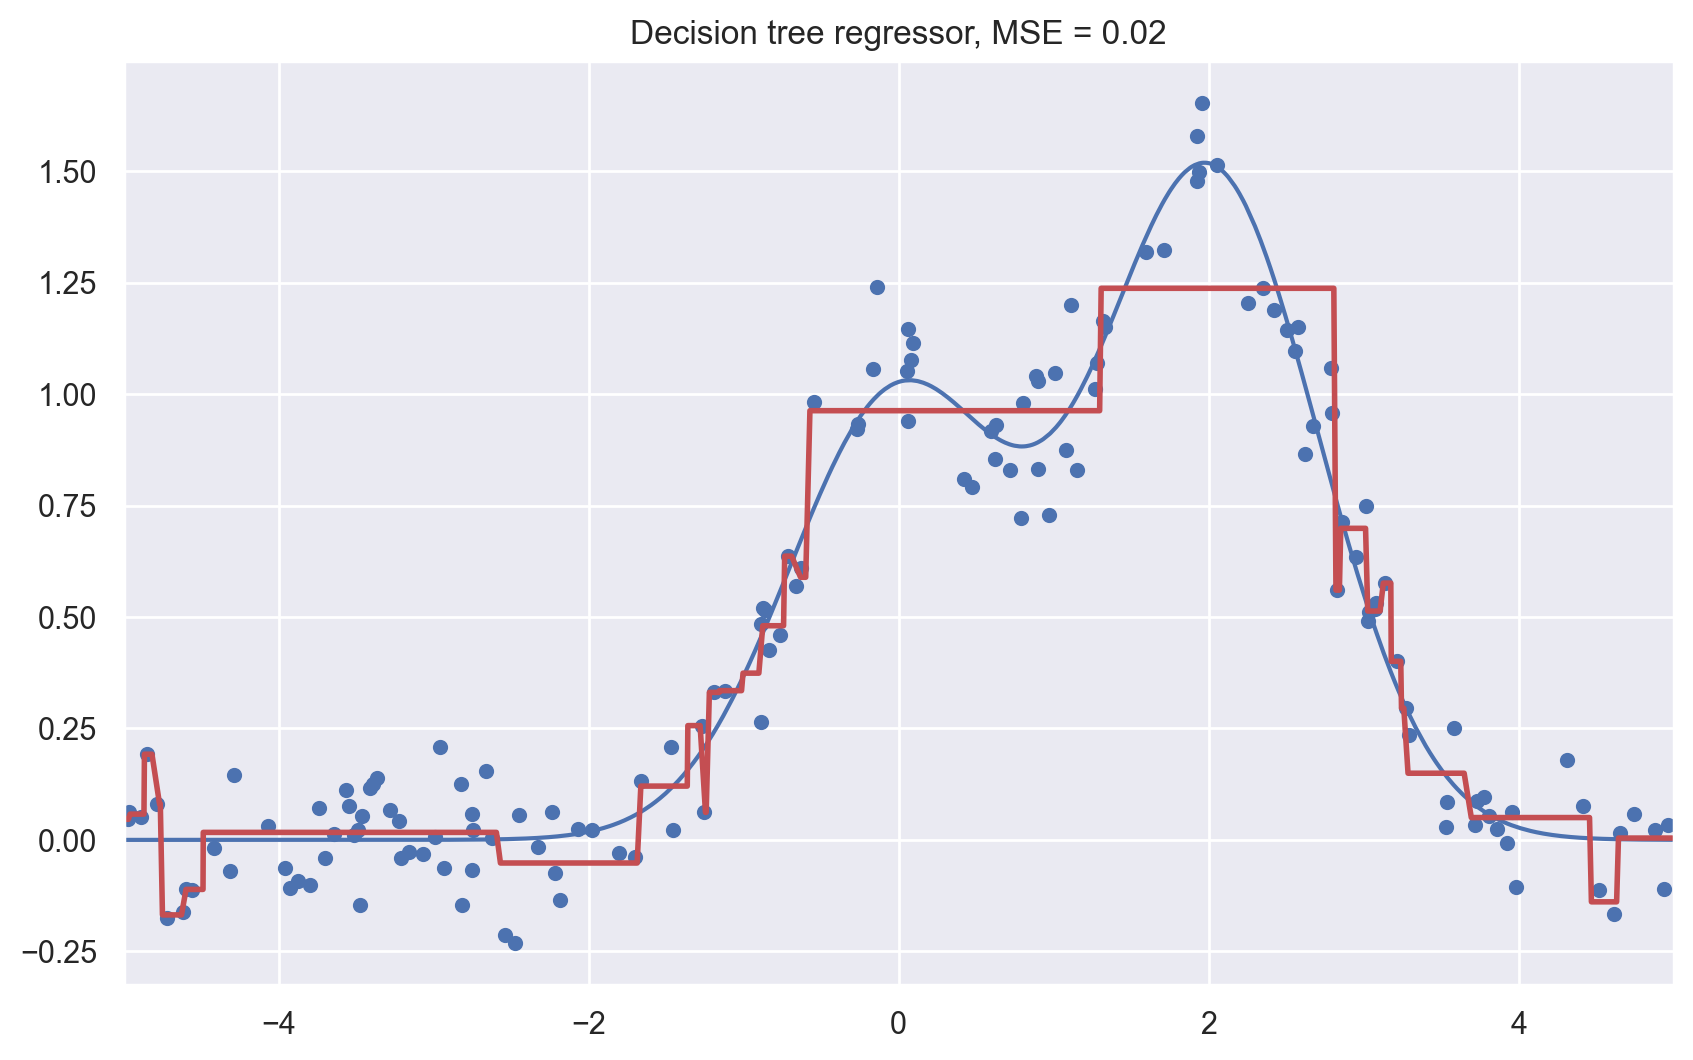

In [135]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))  # Первый пик
        + 1.5 * np.exp(-((X - 2) ** 2))  # Второй пик, выше первого
        + np.random.normal(0.0, noise, n_samples)  # Добавление шума
    )
    X = X.reshape((n_samples, 1)) # превращаем в матрицу с 1 колонкой
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, c="r", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()